## Observations and Insights 

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(df['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df = df[df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
print (duplicates_df)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean=df[df['Mouse ID'] != 'g989']

In [6]:
# Checking the number of mice in the clean DataFrame.
len(df_clean['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_df = df_clean.groupby('Drug Regimen')
tumor_mean=regimen_df['Tumor Volume (mm3)'].mean().round(2)
tumor_median=regimen_df['Tumor Volume (mm3)'].median().round(2)
tumor_variance=regimen_df['Tumor Volume (mm3)'].var().round(2)
tumor_std=regimen_df['Tumor Volume (mm3)'].std().round(2)
tumor_sem=regimen_df['Tumor Volume (mm3)'].sem().round(2)

# This method is the most straighforward, creating multiple series and putting them all together at the end.


tumor_by_regimen=pd.DataFrame(
{"Mean Tumor Volume": tumor_mean,
"Median Tumor Volume": tumor_median,
"Tumor Volume Variance": tumor_variance,
"Tumor Volume Std. Dev": tumor_std,
"Tumor Volume Std. Err": tumor_sem})
tumor_by_regimen

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_mean2=df_clean.groupby('Drug Regimen', as_index=True)['Tumor Volume (mm3)'].mean()
tumor_median2=df_clean.groupby('Drug Regimen', as_index=True)['Tumor Volume (mm3)'].median()
tumor_variance2=df_clean.groupby('Drug Regimen', as_index=True)['Tumor Volume (mm3)'].var()
tumor_std2=df_clean.groupby('Drug Regimen', as_index=True)['Tumor Volume (mm3)'].std()
tumor_sem2=df_clean.groupby('Drug Regimen', as_index=True)['Tumor Volume (mm3)'].sem()


tumor_summary=pd.DataFrame(
{"Mean Tumor Volume": tumor_mean2,
"Median Tumor Volume": tumor_median2,
"Tumor Volume Variance": tumor_variance2,
"Tumor Volume Std Dev": tumor_std2,
"Tumor Volume Std Err": tumor_sem2})

# This method produces everything in a single groupby function
tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

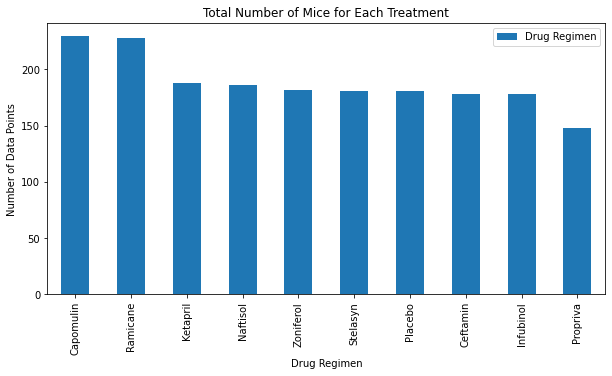

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

Mouse_Drugs=pd.DataFrame(df_clean["Drug Regimen"].value_counts())

Mouse_Drugs

Mouse_Drugs.plot(kind="bar", figsize=(10,5), align="center")

# Set a title for the chart
plt.title("Total Number of Mice for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()


Text(0, 0.5, 'Number of Data Points')

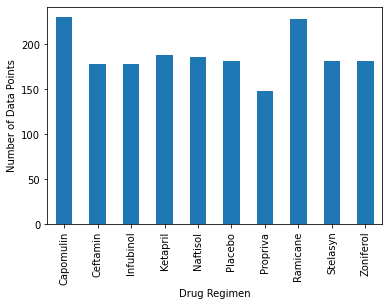

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Create a group based on the values in the 'maker' column
regimen_group = df_clean.groupby('Drug Regimen')

# Count how many mice per regimen
count_regimen = regimen_group['Drug Regimen'].count()

count_regimen 



# Create a bar chart based off of the group series from before
count_chart = count_regimen.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Data Points")


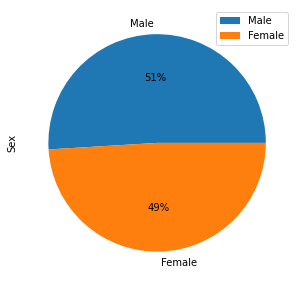

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

Mouse_Gender=pd.DataFrame(df_clean["Sex"].value_counts())
Mouse_Gender
Gender_plot = Mouse_Gender.plot.pie(y='Sex', figsize=(5, 5),autopct='%1.0f%%')

/opt/anaconda2/envs/p36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':


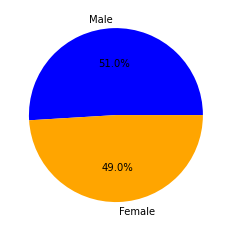

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0)


plt.pie(Mouse_Gender,explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=0)
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
Timepoint_max=df_clean.groupby(['Mouse ID'])['Timepoint'].max()
Timepoint_max.describe()

count    248.000000
mean      32.903226
std       15.495811
min        0.000000
25%       20.000000
50%       45.000000
75%       45.000000
max       45.000000
Name: Timepoint, dtype: float64

In [14]:
# Merge this group df with the original dataframe...

new_df = pd.merge(Timepoint_max, df_clean, how='left', left_on=['Mouse ID','Timepoint'], right_on = ['Mouse ID','Timepoint'])
new_df
new_df['Timepoint'].describe()

count    248.000000
mean      32.903226
std       15.495811
min        0.000000
25%       20.000000
50%       45.000000
75%       45.000000
max       45.000000
Name: Timepoint, dtype: float64

In [15]:
#tumor volume at the last timepoint
new_df['Tumor Volume (mm3)'].describe()


count    248.000000
mean      54.968606
std       12.671479
min       22.050126
25%       45.875867
50%       55.793278
75%       65.053624
max       78.567014
Name: Tumor Volume (mm3), dtype: float64

In [16]:
#rename column headers to make them easier to work with

new_df2=new_df.rename(columns={'Mouse ID':'ID', 'Timepoint':'Timepoint', 'Drug Regimen':'Drug', 'Sex':'Sex', 'Age_months':'Age',
       'Weight (g)':'Weight', 'Tumor Volume (mm3)':'Tumor', 'Metastatic Sites':'metastatic'})
new_df2

,ID,Timepoint,Drug,Sex,Age,Weight,Tumor,metastatic
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

drug_list=[]
tumor_vol=[]

#Locate the rows which contain mice on each drug and get the tumor volumes 

for row_num, i in enumerate(new_df2['Drug']):
    if i in treatment_list:
        drug_list.append(i)
        tumor_vol.append(new_df2['Tumor'][row_num])
        
drug_tumor=pd.DataFrame({"Drug Regimen": drug_list,
"Tumor Volume": tumor_vol})
drug_tumor

,Drug Regimen,Tumor Volume
0,Infubinol,67.973419
1,Infubinol,65.525743
2,Ceftamin,62.999356
3,Ramicane,38.407618
4,Ramicane,43.047543
...,...,...
95,Ceftamin,68.594745
96,Capomulin,31.896238
97,Ceftamin,64.729837
98,Ramicane,30.638696


In [18]:
#alternative strategy that doesn't require for loops
treatment_rows =new_df2[new_df2["Drug"].isin(treatment_list)]
treatment_rows

tumor_values = treatment_rows[["Drug", "Tumor"]]
tumor_values

,Drug,Tumor
0,Infubinol,67.973419
1,Infubinol,65.525743
3,Ceftamin,62.999356
6,Ramicane,38.407618
7,Ramicane,43.047543
...,...,...
238,Ceftamin,68.594745
239,Capomulin,31.896238
240,Ceftamin,64.729837
244,Ramicane,30.638696


In [19]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = tumor_values['Tumor'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")  

outlier_tumor = tumor_values.loc[(tumor_values['Tumor'] < lower_bound) | (tumor_values['Tumor'] > upper_bound)]
outlier_tumor

The lower quartile of tumor volume is: 37.187743802499995
The upper quartile of tumor volume is: 59.930261755000004
The interquartile range of tumor volume is: 22.74251795250001
The the median of tumor volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


,Drug,Tumor


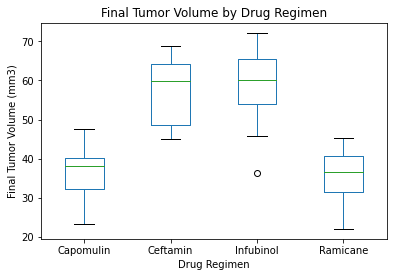

In [20]:
# Create the boxplot
boxplot = tumor_values.boxplot(column=['Tumor'], by='Drug',
                return_type =None)

boxplot.set_title('Final Tumor Volume by Drug Regimen')
boxplot.set_ylabel('Final Tumor Volume (mm3)')
boxplot.set_xlabel('Drug Regimen')
boxplot.yaxis.grid(False)
boxplot.xaxis.grid(False)
plt.suptitle('')
plt.show()

## Line and Scatter Plots

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin=df_clean.loc[df_clean['Drug Regimen'] == 'Capomulin']
capomulin

mouse=capomulin.loc[capomulin['Mouse ID'] == 'b128'] 
mouse
m_time=mouse['Timepoint']
m_time

300     0
301     5
302    10
303    15
304    20
305    25
306    30
307    35
308    40
309    45
Name: Timepoint, dtype: int64

In [22]:
m_tumor=mouse['Tumor Volume (mm3)']
m_tumor

300    45.000000
301    45.651331
302    43.270852
303    43.784893
304    42.731552
305    43.262145
306    40.605335
307    37.967644
308    38.379726
309    38.982878
Name: Tumor Volume (mm3), dtype: float64

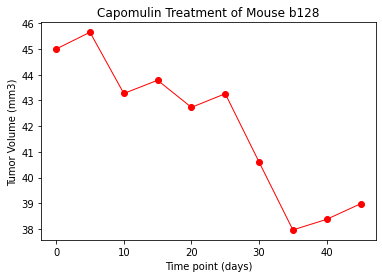

In [23]:
plt.title("Capomulin Treatment of Mouse b128")
plt.xlabel("Time point (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.plot(m_time, m_tumor, marker="o", color="red", linewidth=1)
plt.show()


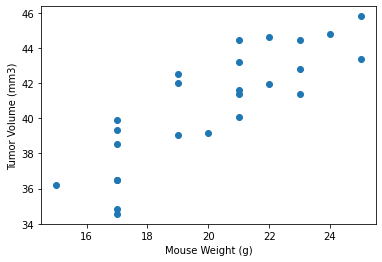

In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

cap_tumor_mean=capomulin.groupby('Mouse ID', as_index=True)['Tumor Volume (mm3)'].mean()
cap_weight_mean=capomulin.groupby('Mouse ID', as_index=True)['Weight (g)'].mean()

cap_tumor_mean
cap_weight_mean

cap_df=pd.DataFrame({"Tumor Volume (mm3)": cap_tumor_mean,
"Weight (g)": cap_weight_mean})
cap_df

plt.scatter(cap_df['Weight (g)'],cap_df['Tumor Volume (mm3)'])
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


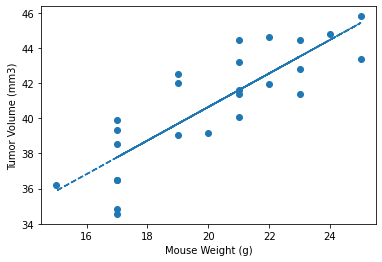

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(cap_df['Weight (g)'],cap_df['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
m_slope, m_int, m_r, m_p, m_std_err = st.linregress(
    cap_df['Weight (g)'], cap_df['Tumor Volume (mm3)'])
m_fit = m_slope * cap_df['Weight (g)'] + m_int
plt.scatter(cap_df['Weight (g)'],cap_df['Tumor Volume (mm3)'])
plt.plot(cap_df['Weight (g)'],m_fit,"--")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()